In [2]:
import numpy as np

import pysindy as ps




In [6]:
import numpy as np

# Function to generate data based on the conditions
def gen_data_with_conditions(n_samples=100, x0=3, y0=0.5):
    # Generate x values
    x = np.linspace(0, 6, n_samples)  # Adjust the range as needed
    
    # Define a linear relationship (as an example)
    # y = mx + b, we need to find m and b such that it passes through (x0, y0)
    m = (y0 - 0) / (x0 - 0)  # slope between (0, 0) and (x0, y0)
    b = 0  # y-intercept
    
    # Calculate y values
    y = m * x + b
    
    return x, y

# Generate data
x, y = gen_data_with_conditions()

# Stack the arrays into a 2D array X
X = np.stack((x, y), axis=-1)  # First column is x, second is y

# Display the shape of the stacked array
print("Shape of X:", X.shape)
print("First few rows of X:\n", X[:5])


Shape of X: (100, 2)
First few rows of X:
 [[0.         0.        ]
 [0.06060606 0.01010101]
 [0.12121212 0.02020202]
 [0.18181818 0.03030303]
 [0.24242424 0.04040404]]


In [7]:
X

array([[0.        , 0.        ],
       [0.06060606, 0.01010101],
       [0.12121212, 0.02020202],
       [0.18181818, 0.03030303],
       [0.24242424, 0.04040404],
       [0.3030303 , 0.05050505],
       [0.36363636, 0.06060606],
       [0.42424242, 0.07070707],
       [0.48484848, 0.08080808],
       [0.54545455, 0.09090909],
       [0.60606061, 0.1010101 ],
       [0.66666667, 0.11111111],
       [0.72727273, 0.12121212],
       [0.78787879, 0.13131313],
       [0.84848485, 0.14141414],
       [0.90909091, 0.15151515],
       [0.96969697, 0.16161616],
       [1.03030303, 0.17171717],
       [1.09090909, 0.18181818],
       [1.15151515, 0.19191919],
       [1.21212121, 0.2020202 ],
       [1.27272727, 0.21212121],
       [1.33333333, 0.22222222],
       [1.39393939, 0.23232323],
       [1.45454545, 0.24242424],
       [1.51515152, 0.25252525],
       [1.57575758, 0.26262626],
       [1.63636364, 0.27272727],
       [1.6969697 , 0.28282828],
       [1.75757576, 0.29292929],
       [1.

In [8]:
y

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [12]:
# mock_data.py

import numpy as np
def gen_data1(n_samples=100, x0=3, y0=1/2):
    t = np.linspace(0, 10, n_samples)
    x = x0 + np.sin(t)  # Generate x based on initial condition x0
    y = y0 + np.cos(t)  # Generate y based on initial condition y0
    return t, x, y


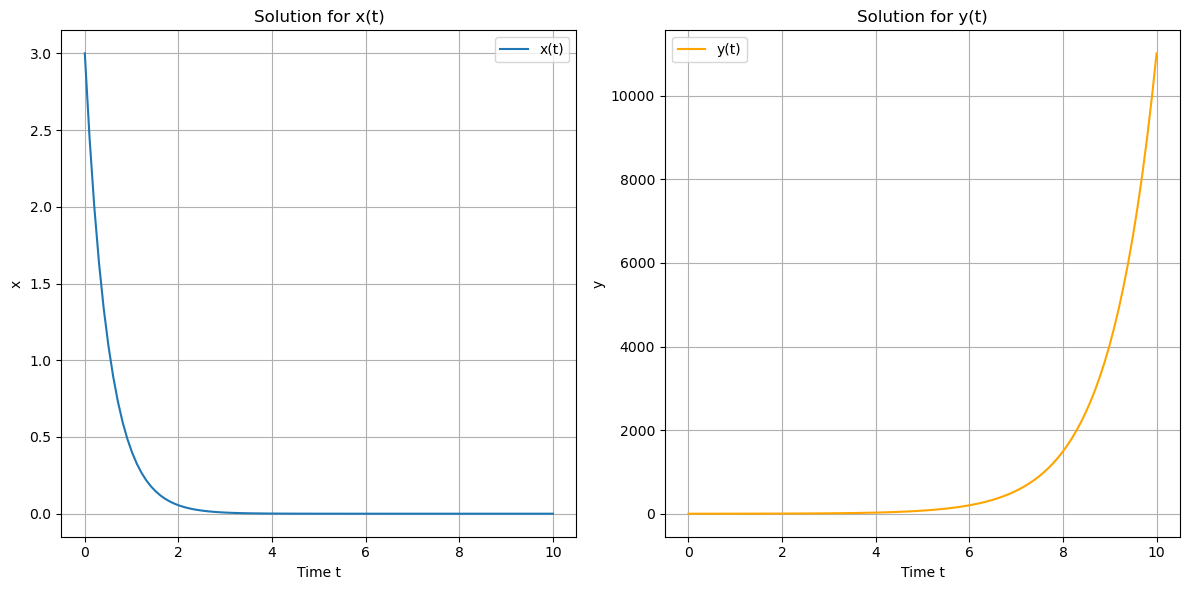

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the system of equations
def system(t, z):
    x, y = z
    dxdt = -2 * x
    dydt = y
    return [dxdt, dydt]

# Initial conditions
x0 = 3
y0 = 1/2
initial_conditions = [x0, y0]

# Time span for the simulation
t_span = (0, 10)  # from t=0 to t=10
t_eval = np.linspace(t_span[0], t_span[1], 100)  # 100 time points

# Solve the system of ODEs
solution = solve_ivp(system, t_span, initial_conditions, t_eval=t_eval)

# Extract the results
t = solution.t
x = solution.y[0]
y = solution.y[1]

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t, x, label='x(t)')
plt.title('Solution for x(t)')
plt.xlabel('Time t')
plt.ylabel('x')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, y, label='y(t)', color='orange')
plt.title('Solution for y(t)')
plt.xlabel('Time t')
plt.ylabel('y')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
%%writefile mock_data.py 

import numpy as np

def gen_data1(n_samples=100, x0=3, y0=1/2, dt=0.1):
    # Initialize time vector
    t = np.linspace(0, dt * (n_samples - 1), n_samples)
    
    # Initialize state arrays
    x = np.zeros(n_samples)
    y = np.zeros(n_samples)
    
    # Set initial conditions
    x[0] = x0
    y[0] = y0
    
    # Simulate the system using Euler's method
    for i in range(1, n_samples):
        dxdt = -2 * x[i - 1]  # dx/dt = -2x
        dydt = y[i - 1]       # dy/dt = y
        
        # Update states
        x[i] = x[i - 1] + dxdt * dt
        y[i] = y[i - 1] + dydt * dt

    return t, x, y


Writing mock_data.py


In [8]:
import numpy as np
from mock_data import gen_data1  # Importing from your mock_data module

# Generate data with specific initial conditions
t, x, y = gen_data1(n_samples=100, x0=3, y0=1/2, dt=0.1)

# Stack the arrays into a 2D array X
X = np.stack((x, y), axis=-1)  # First column is x, second is y

# Display the shape of the stacked array
print("Shape of X:", X.shape)
print("First few rows of X:\n", X[:5])


Shape of X: (100, 2)
First few rows of X:
 [[3.      0.5    ]
 [2.4     0.55   ]
 [1.92    0.605  ]
 [1.536   0.6655 ]
 [1.2288  0.73205]]


In [3]:
import numpy as np
from pysindy.differentiation.base import BaseDifferentiation

class SimpleFiniteDifference(BaseDifferentiation):
    def __call__(self, x, t=1):
        return np.gradient(x, t, axis=0)  # Using numpy's built-in gradient function




In [15]:
 differentiation_method = ps.FiniteDifference(order=2)

# We could instead call ps.differentiation.FiniteDifference(order=2)

# differentiation_method=ps.SmoothedFiniteDifference()

#differentiation_method=SimpleFiniteDifference()

# Initialize Pysindy with this custom differentiation method
# model = ps.SINDy(differentiation_method=SimpleFiniteDifference())

In [ ]:
#model = ps.SINDy(differentiation_method=ps.SmoothedFiniteDifference())


In [4]:
feature_library = ps.PolynomialLibrary(degree=3)

# Note: We could instead call ps.feature_library.PolynomialLibrary(degree=3)

In [17]:
optimizer = ps.STLSQ(threshold=0.2)

# Note: We could instead call ps.optimizers.STLSQ(threshold=0.2)

TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'

In [13]:
# Monkeypatch
from scipy.special import factorial
np.math = type('math', (), {})()
np.math.factorial = factorial

In [16]:
model = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=["x", "y"],
)

NameError: name 'optimizer' is not defined

In [28]:
import pysindy as ps

In [25]:
import numpy as np

In [9]:
model.fit(X, t=t)

NameError: name 'model' is not defined

In [11]:
model.print()

NameError: name 'model' is not defined

In [45]:
# Generate training data

dt = 0.01
t_train = np.arange(0, 25, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [2, 0]
x_train = solve_ivp(linear_damped_SHO, t_train_span,
                    x0_train, t_eval=t_train, **integrator_keywords).y.T

In [46]:
x_train

array([[ 2.        ,  0.        ],
       [ 1.99760141, -0.03995736],
       [ 1.99440741, -0.07981887],
       ...,
       [ 0.15601786,  0.0526537 ],
       [ 0.1568827 ,  0.04947352],
       [ 0.15768297,  0.04627988]])

In [49]:
xi_train = np.random.rand(100, 3)

In [50]:
xi_train

array([[0.65358959, 0.11500694, 0.95028286],
       [0.4821914 , 0.87247454, 0.21233268],
       [0.04070962, 0.39719446, 0.2331322 ],
       [0.84174072, 0.20708234, 0.74246953],
       [0.39215413, 0.18225652, 0.74353941],
       [0.06958208, 0.8853372 , 0.9526444 ],
       [0.93114343, 0.41543095, 0.02898166],
       [0.98202748, 0.33963768, 0.70668719],
       [0.36187707, 0.0351059 , 0.85505825],
       [0.65725351, 0.76568299, 0.55408724],
       [0.88509294, 0.90419762, 0.0104217 ],
       [0.07455674, 0.24462921, 0.13330475],
       [0.6979251 , 0.39820488, 0.88312219],
       [0.18100751, 0.43249917, 0.0181432 ],
       [0.69143786, 0.46969065, 0.12822219],
       [0.89133705, 0.91820362, 0.07312099],
       [0.04544794, 0.4385729 , 0.60172093],
       [0.31022703, 0.68190824, 0.20901315],
       [0.5196043 , 0.56598883, 0.44116739],
       [0.13755616, 0.21354319, 0.13337189],
       [0.3222967 , 0.23388712, 0.52749816],
       [0.56597116, 0.43822528, 0.32187262],
       [0.

In [1]:
feats_names = ['x', 'y', 'z']
opt = ps.STLSQ(threshold=0.1)
model = ps.SINDy(feature_names=feats_names, optimizer=opt)
model.fit(xi_train, t=dt)
model.print()

NameError: name 'ps' is not defined

In [10]:
# Generate training data

dt = 0.01
t_train = np.arange(0, 25, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [2, 0]
x_train = solve_ivp(linear_damped_SHO, t_train_span,
                    x0_train, t_eval=t_train, **integrator_keywords).y.T

Next we fit a SINDy model to the training data, finding that it recovers the correct governing equations.

In [11]:
# Fit the model

poly_order = 5
threshold = 0.05

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
)
model.fit(x_train, t=dt)
model.print()

AttributeError: module 'numpy' has no attribute 'math'

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow
import numpy as np
from scipy.integrate import solve_ivp
from scipy.io import loadmat
from pysindy.utils import linear_damped_SHO
from pysindy.utils import cubic_damped_SHO
from pysindy.utils import linear_3D
from pysindy.utils import hopf
from pysindy.utils import lorenz

import pysindy as ps

# ignore user warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

np.random.seed(1000)  # Seed for reproducibility

# Integrator keywords for solve_ivp
integrator_keywords = {}
integrator_keywords['rtol'] = 1e-12
integrator_keywords['method'] = 'LSODA'
integrator_keywords['atol'] = 1e-12